In [36]:
from casatools import ms
import numpy as np
import matplotlib.pyplot as plt
from casatools import ms, table

In [58]:
# Input MS file
fnameMS = "/fast/msurajit/slow_calib/realtime_code_output/ms_calib/20250418_140405_50MHz.ms"
N_ant = 352

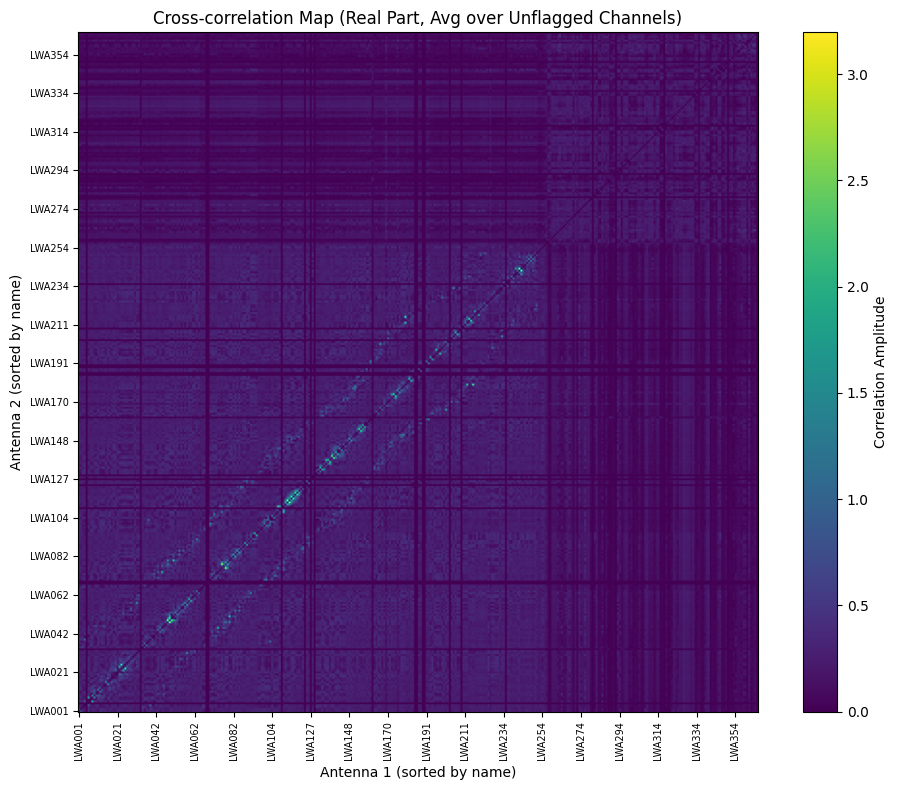

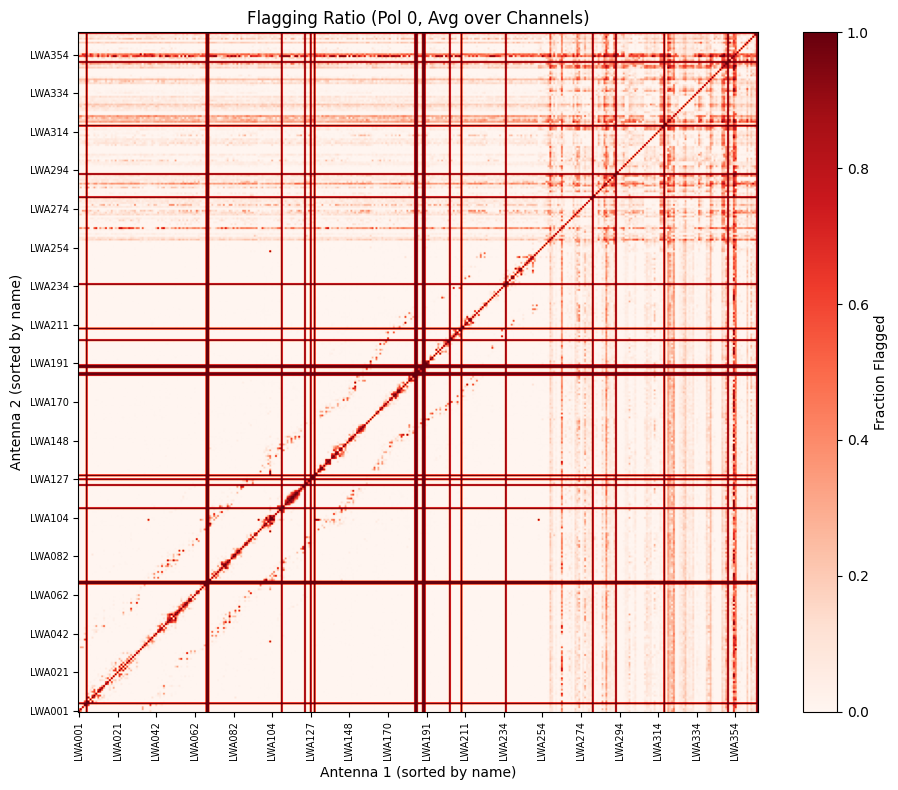

In [67]:
from casatools import ms, table
import numpy as np
import matplotlib.pyplot as plt

# Input MS file
fnameMS = "/fast/msurajit/slow_calib/realtime_code_output/ms_calib/20250419_140102_55MHz.ms"

# === Step 1: Load and sort antenna names ===
tb = table()
tb.open(fnameMS + '/ANTENNA')
ant_names = tb.getcol('NAME')
tb.close()

sorted_indices = np.argsort(ant_names)
#sorted_indices = np.arange(len(ant_names))
sorted_ant_names = ant_names[sorted_indices]
index_map = {old_idx: new_idx for new_idx, old_idx in enumerate(sorted_indices)}
N_ant = len(ant_names)

# === Step 2: Load data and flags from MS ===
ms_tool = ms()
ms_tool.open(fnameMS)
ms_tool.selectinit(reset=True)
data = ms_tool.getdata(['data', 'flag', 'antenna1', 'antenna2'], ifraxis=True)
ms_tool.close()

data_array = data['data']          # shape: (n_pol, n_chan, n_baseline)
flag_array = data['flag']          # shape: (n_pol, n_chan, n_baseline)
ant1 = data['antenna1']
ant2 = data['antenna2']

# === Step 3: Initialize matrices ===
corr_matrix = np.zeros((N_ant, N_ant), dtype=np.complex64)
flag_matrix = np.zeros((N_ant, N_ant), dtype=np.float32)

# === Step 4: Fill matrices symmetrically ===
for i in range(len(ant1)):
    a1 = ant1[i]
    a2 = ant2[i]
    i1 = index_map[a1]
    i2 = index_map[a2]

    # Skip autocorrelations
    if i1 == i2:
        continue

    # Masked array: mask where flagged
    data_chan = data_array[0, :, i]          # shape: (n_chan,)
    flags_chan = flag_array[0, :, i]         # shape: (n_chan,)
    masked_data = np.ma.array(data_chan, mask=flags_chan)

    # Average only over unflagged data
    avg_corr = masked_data.mean()
    corr_matrix[i1, i2] = avg_corr
    corr_matrix[i2, i1] = avg_corr  # symmetric

    # Flag ratio
    flag_ratio = flags_chan.mean()
    flag_matrix[i1, i2] = flag_ratio
    flag_matrix[i2, i1] = flag_ratio

# === Step 5: Set diagonal (auto-correlation) to 0 ===
np.fill_diagonal(corr_matrix, 0)
np.fill_diagonal(flag_matrix, 1)

# === Step 6: Plot correlation map ===
plt.figure(figsize=(10, 8))
plt.imshow(np.abs(corr_matrix), origin='lower', cmap='viridis')
tick_locs = np.arange(0, N_ant, 20)
plt.xticks(tick_locs, sorted_ant_names[tick_locs], rotation=90, fontsize=7)
plt.yticks(tick_locs, sorted_ant_names[tick_locs], fontsize=7)
plt.xlabel('Antenna 1 (sorted by name)')
plt.ylabel('Antenna 2 (sorted by name)')
plt.title('Cross-correlation Map (Real Part, Avg over Unflagged Channels)')
plt.colorbar(label='Correlation Amplitude')
plt.tight_layout()

# === Step 7: Plot flagging ratio map ===
plt.figure(figsize=(10, 8))
plt.imshow(flag_matrix, origin='lower', cmap='Reds', vmin=0, vmax=1)
plt.xticks(tick_locs, sorted_ant_names[tick_locs], rotation=90, fontsize=7)
plt.yticks(tick_locs, sorted_ant_names[tick_locs], fontsize=7)
plt.xlabel('Antenna 1 (sorted by name)')
plt.ylabel('Antenna 2 (sorted by name)')
plt.title('Flagging Ratio (Pol 0, Avg over Channels)')
plt.colorbar(label='Fraction Flagged')
plt.tight_layout()

plt.show()


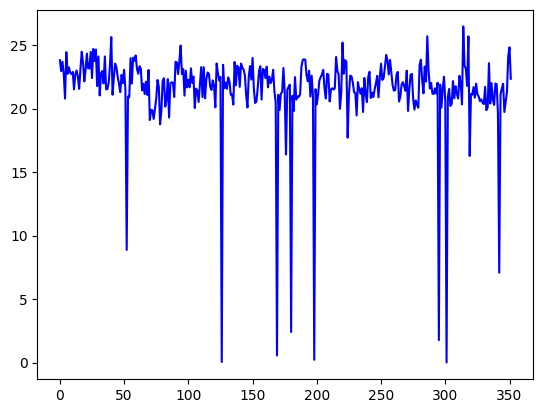

In [33]:
auto_corr = np.diag(corr_matrix)

plt.plot(auto_corr, label='Auto-correlation', color='blue')

In [47]:
ant_names

array(['LWA266', 'LWA259', 'LWA268', 'LWA267', 'LWA271', 'LWA269',
       'LWA276', 'LWA273', 'LWA278', 'LWA277', 'LWA282', 'LWA281',
       'LWA307', 'LWA285', 'LWA309', 'LWA308', 'LWA311', 'LWA310',
       'LWA313', 'LWA312', 'LWA321', 'LWA314', 'LWA330', 'LWA327',
       'LWA338', 'LWA332', 'LWA340', 'LWA339', 'LWA352', 'LWA341',
       'LWA362', 'LWA353', 'LWA257', 'LWA255', 'LWA260', 'LWA258',
       'LWA265', 'LWA263', 'LWA272', 'LWA270', 'LWA283', 'LWA280',
       'LWA288', 'LWA284', 'LWA292', 'LWA291', 'LWA296', 'LWA295',
       'LWA301', 'LWA298', 'LWA305', 'LWA303', 'LWA317', 'LWA306',
       'LWA320', 'LWA318', 'LWA336', 'LWA335', 'LWA343', 'LWA337',
       'LWA351', 'LWA344', 'LWA360', 'LWA354', 'LWA002', 'LWA001',
       'LWA004', 'LWA003', 'LWA006', 'LWA005', 'LWA009', 'LWA007',
       'LWA011', 'LWA010', 'LWA012', 'LWA008', 'LWA040', 'LWA038',
       'LWA042', 'LWA041', 'LWA044', 'LWA043', 'LWA046', 'LWA045',
       'LWA071', 'LWA047', 'LWA074', 'LWA073', 'LWA077', 'LWA0